<a href="https://colab.research.google.com/github/ucfilho/Vinicius_Air/blob/main/JUN/EstimationTPQuestions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M3.1 - Base des Probabilités et Statistiques (C. Mattrand)


# Estimation - Mise en pratique

L'objectif de ce TP est d'estimer les paramètres de la loi de Weibull en mettant en oeuvre la méthode du Maximum de Vraisemblance et la technique de ré-échantillonnage Bootstrap.

On suppose donc ici que $X \sim \text{Weibull}\left(\beta, \eta, \gamma \right)$ avec :

- $\beta$ : le paramètre de forme
- $\eta$ : le paramètre d'échelle
- $\gamma$ : le paramètre de position.

On suppose ici que $\gamma = 0$.

Pour rappel, l'expression de la densité de proabibilité est donnée par :

$\forall x \in X(\Omega) = \mathbb{R}^+, \space p_{model}(x) = f_X(x) = \frac{\beta}{\eta} \big(\frac{x}{\eta}\big)^{\beta-1}\exp\big(-({\frac{x}{\eta}})^\beta\big)$

On notera $\theta = \{\beta, \eta\}^T$ le vecteur de paramètres à estimer.

**Question 1 :**  Pour un échantillon de données $\mathbb{X} = \left(x_1, x_2, \cdots, x_n\right)$ , donner analytiquement les gradients du logarithme népérien de la vraisemblance.

**Question 2 :**  Pour un échantillon de données $\mathbb{X} = \left(x_1, x_2, \cdots, x_n\right)$ , simuler suivant une loi de Weibull avec $\beta = 2$ et $\eta = 10$ avec la fonction *scipy.stats.weibull_min.rvs*. Programmer l'estimation ponctuelle de vraisemblance. On utilisera la fonction *scipy.optimize.minimize* pour l'optimisation (méthode SLSQP).

On choisit ici $n =50$. 

In [9]:
## importation des librairies ##
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import scipy.optimize
import scipy.io
from matplotlib import rc
import pandas as pd
import seaborn as sns

# Données
np.random.seed(10) # on fixe le germe pour avoir les mêmes résultats quand on répète le notebook1
n = 50 # taille échantillon
theta = np.array([2.,10.]) #theta[0] = beta ; theta[1] = eta

from scipy.stats import weibull_min

n = 50     # number of samples
k = theta[0]  # shape
lam = theta[1]    # scale

x = weibull_min.rvs(k, loc=0, scale=lam, size=n)
print(x)


[2.07932314 1.35890925 2.00083071 2.06569289 1.92719353 1.74429901
 1.71955139 2.07273247 1.68969336 1.5762987  2.02926147 2.23711021
 1.15015538 1.93478358 2.10582205 1.9893707  2.04986702 1.79816293
 2.19176606 2.04574776 1.95143845 1.65805221 1.85350789 2.02302352
 1.89497771 1.89040741 1.99220983 1.93530614 2.00996509 1.9831539
 2.10090153 1.9399954  2.18235339 1.81770799 1.58022151 1.80459154
 1.61925764 2.11682771 1.47632743 1.99683101 1.95418629 2.11033336
 1.72040936 2.13745309 1.8395506  2.06918578 1.80115514 2.15946841
 1.82203897 1.6851549 ]


In [ ]:
'''
[12.14674625  1.44811246 10.0207849  11.75381343  8.30762093  5.04608652
  4.69813856 11.95545944  4.30417089  3.04118335 10.75325799 17.5100313
  0.62897387  8.47250809 12.9407178   9.73707709 11.3104129   5.87482898
 15.80596474 11.19722611  8.84350258  3.91598506  6.83631745 10.58899355
  7.6360814   7.54444116  9.80675712  8.48395581 10.25162219  9.58588282
 12.79023446  8.58723846 15.46946911  6.20112661  3.07921396  5.98059801
  3.47880264 13.28243151  2.19161099  9.92102592  8.90594147 13.07992782
  4.70987092 13.94225362  6.58277051 11.85352314  5.92387146 14.67520919
  6.27535543  4.24667627]
'''

In [ ]:
def moinsLikel(theta,x):
    ...
    return  ...

theta0 = np.array([10.,20.]) # point de départ de l'algorithme itératif d'optimisation
res = ...
thetaChapEMV = res.x
print("Résultats de l'optimisation :", res)
print('\n')
print("L'estimation ponctuelle par Maximum de Vraisemblance vaut:",thetaChapEMV)

Résultats de l'optimisation :      fun: 139.72619558778533
     jac: array([-0.00045967, -0.00023651])
 message: 'Optimization terminated successfully'
    nfev: 50
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([2.28796455, 9.7108952 ])


L'estimation ponctuelle par Maximum de Vraisemblance vaut: [2.28796455 9.7108952 ]


<ipython-input-2-49c1d4a8e792>:5: RuntimeWarning: invalid value encountered in log
  lnL = n*np.log(beta) - n*np.log(eta) + (beta-1)*np.sum(np.log(x)) \
<ipython-input-2-49c1d4a8e792>:6: RuntimeWarning: invalid value encountered in log
  - n*(beta-1)*np.log(eta) - np.sum((x/eta)**beta)
<ipython-input-2-49c1d4a8e792>:6: RuntimeWarning: invalid value encountered in power
  - n*(beta-1)*np.log(eta) - np.sum((x/eta)**beta)


**Question 3 :**  Estimer la matrice de covariance (à partir de la matrice de Fisher). Existe-t-il une corrélation linéaire entre les variables ? 

Pour l'inverse on utilisera la fonction *np.linalg.inv*.

In [ ]:
def matFisher(theta,x):
    I11 = ...
    I12 = ...
    I22 = ...
    InTheta = np.array([[I11, I12],[I12, I22]]) # matrice information de Fisher
    return InTheta

InTheta = matFisher(thetaChapEMV,x)
print("La matrice de Fisher est :", InTheta)
print('\n')

CovTheta = np.linalg.inv(InTheta)
print("La matrice de covariance est :", CovTheta)

# calcul de la corrélation
print('\n')
corr_beta_eta = ...
print("Le coefficient de correlation linéaire :", corr_beta_eta)

La matrice de Fisher est : [[15.68301546 -1.95746136]
 [-1.95746136  2.7756358 ]]


La matrice de covariance est : [[0.06991758 0.04930797]
 [0.04930797 0.39505127]]


Le coefficient de correlation linéaire : 0.2966860813355028


**Question 4:** On donnera les ICs bilatéraux symétriques des paramètres $\beta$ et $\eta$ pour le niveau de confiance $1-\alpha$. Pour le fracticle de la loi normale, on utilisera la fonction *scipy.stats.norm.ppf*

In [ ]:
alpha = 0.05 # risque de première espèce
fractile =  ... # il s'agit du fractile pour 1-alpha/2
print("Le fractile de la loi normale centrée réduite vaut {}, \
pour la probabilité : {}.".format(fractile,1-alpha))
print('\n')

borneInfEMVbeta = ...
borneSupEMVbeta = ...

borneInfEMVeta = ...
borneSupEMVeta = ...

print("Les bornes de l'intervalle de confiance pour beta estimées par Max. Vrais.\
sont :", borneInfEMVbeta, borneSupEMVbeta)
print('\n')
print("Les bornes de l'intervalle de confiance pour eta estimées par Max. Vrais.  \
sont :", borneInfEMVeta, borneSupEMVeta)

Le fractile de la loi normale centrée réduite vaut 1.959963984540054, pour la probabilité : 0.95.


Les bornes de l'intervalle de confiance pour beta estimées par Max. Vrais.sont : 1.7697122083728738 2.8062168964871104


Les bornes de l'intervalle de confiance pour eta estimées par Max. Vrais.  sont : 8.478997005759213 10.942793403437237


**Question 5 :** En faisant varier $n$ on étudiera la convergence de l'estimateur de vraisemblance des paramètres de la loi de Weibull. Pour chaque paramètre du vecteur $\theta$ on tracera les IC en fonction de $n$. Quelles remarques pouvez-vous faire ?

<ipython-input-2-49c1d4a8e792>:5: RuntimeWarning: invalid value encountered in log
  lnL = n*np.log(beta) - n*np.log(eta) + (beta-1)*np.sum(np.log(x)) \
<ipython-input-2-49c1d4a8e792>:6: RuntimeWarning: invalid value encountered in log
  - n*(beta-1)*np.log(eta) - np.sum((x/eta)**beta)
<ipython-input-2-49c1d4a8e792>:6: RuntimeWarning: invalid value encountered in power
  - n*(beta-1)*np.log(eta) - np.sum((x/eta)**beta)
<ipython-input-2-49c1d4a8e792>:6: RuntimeWarning: overflow encountered in power
  - n*(beta-1)*np.log(eta) - np.sum((x/eta)**beta)


Text(0.5, 1.0, "Evolution de l'IC de $\\eta$ avec $n$")

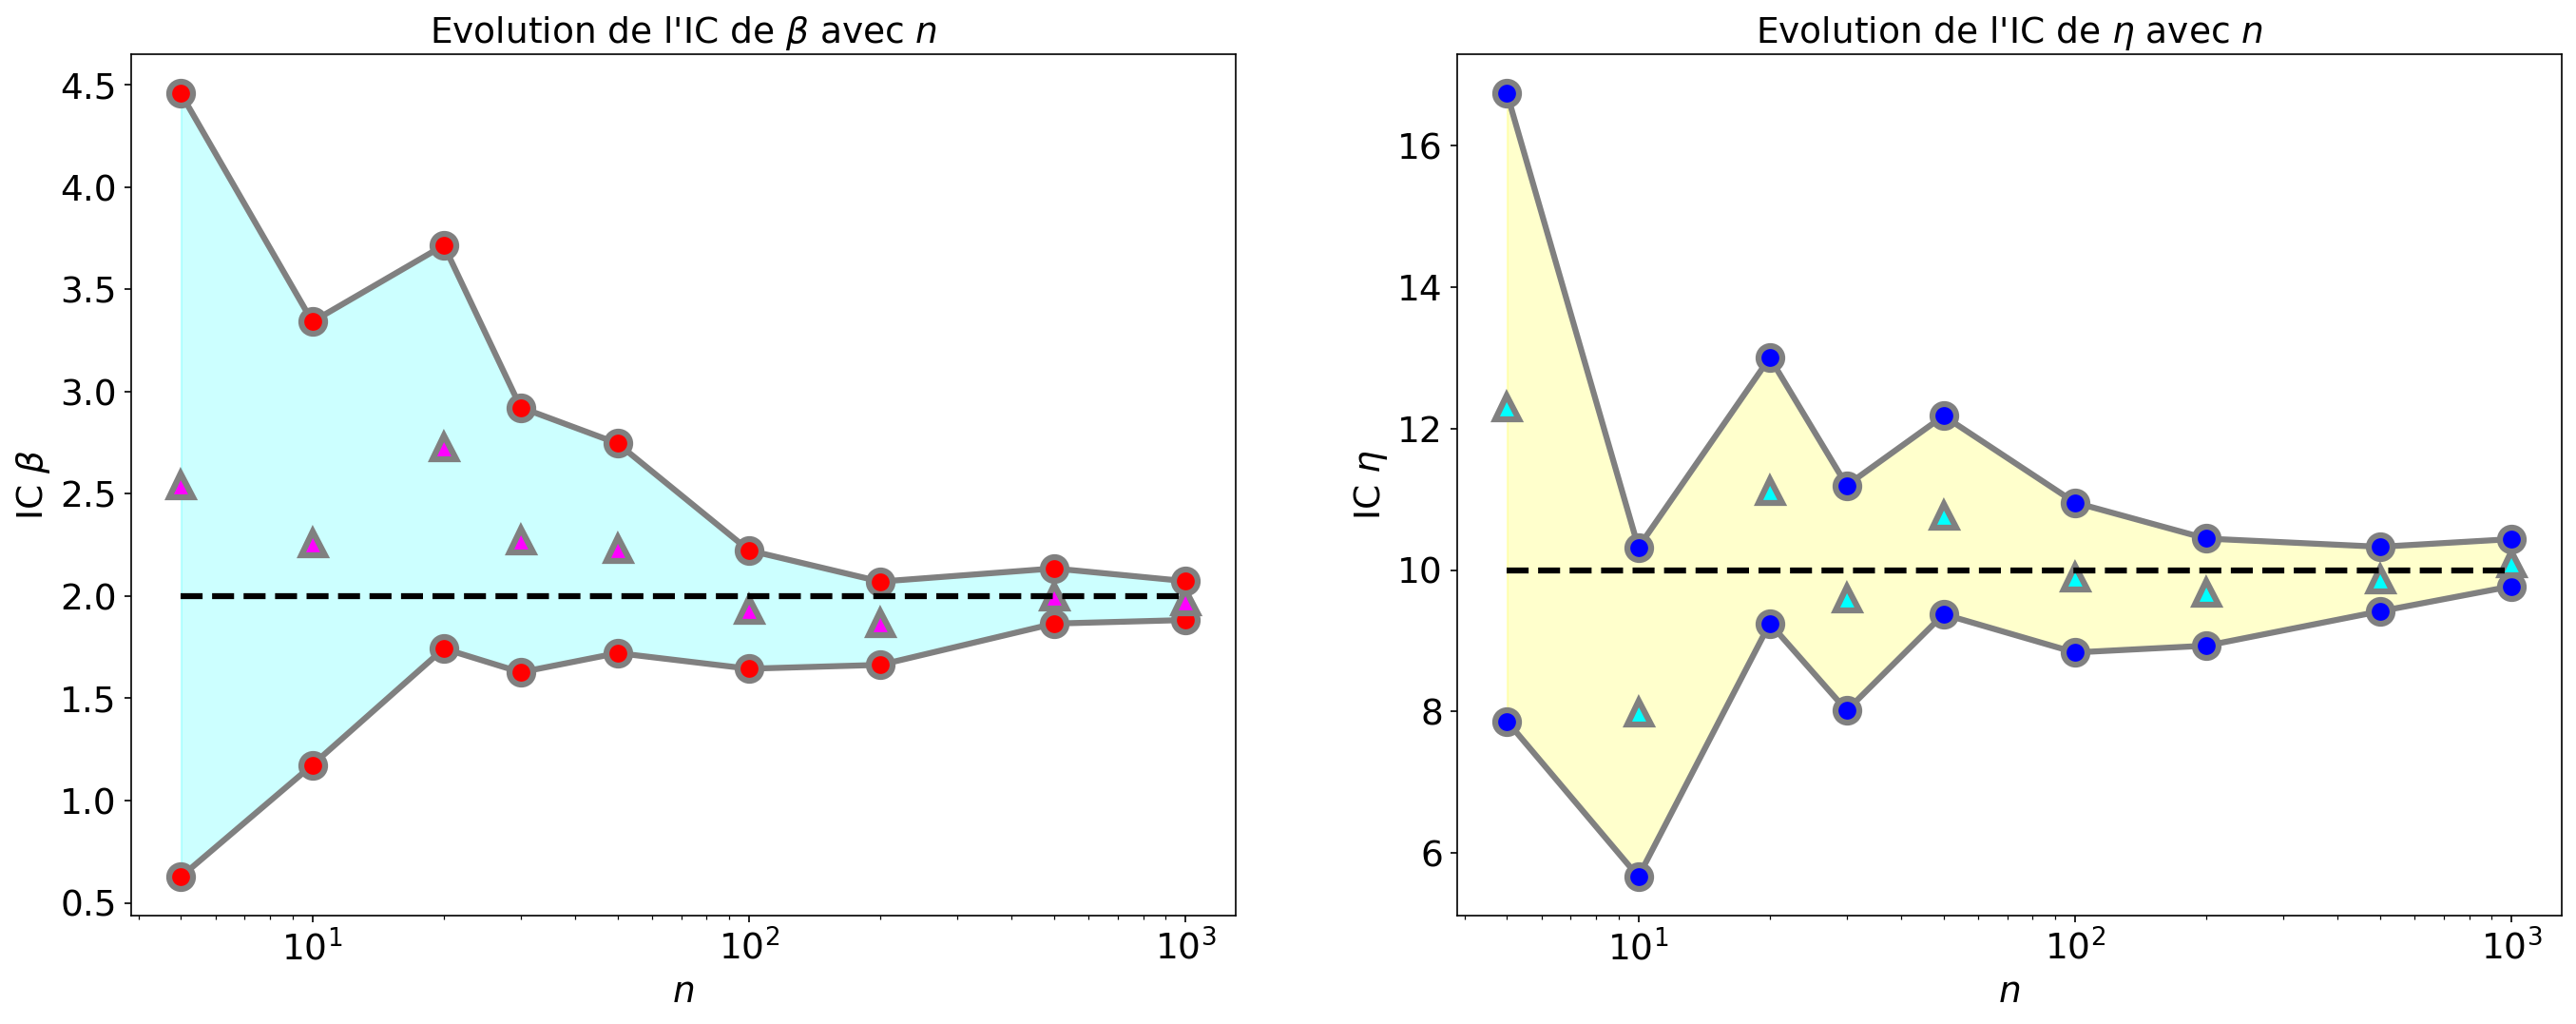

In [ ]:
np.random.seed(10)

n = np.array([5, 10, 20, 30, 50, 100, 200, 500, 1000]) # taille des échantillons

bChapEMV = np.zeros((n.size,)) # estimation ponctuelle par MV pour beta
eChapEMV = np.zeros((n.size,)) # estimation ponctuelle par MV pour eta

bInfbeta = np.zeros((n.size,)) # borne inf pour beta
bSupbeta= np.zeros((n.size,)) # borne sup pour beta
bInfeta = np.zeros((n.size,)) # borne inf pour eta
bSupeta= np.zeros((n.size,)) # borne sup pour beta

alpha = 0.05 
fractile =  scipy.stats.norm.ppf(1-alpha/2,loc=0,scale =1) # il s'agit du fractile pour 1-alpha/2

for i in range(n.size): # on boucle sur la taille de l'échantillon
    x = ...
    res = ...
    bChapEMV[i] = ...
    eChapEMV[i] = ...
    thetaChapEMV = ...
  
    InTheta = matFisher(thetaChapEMV,x)
    CovTheta = np.linalg.inv(InTheta)
    
    bInfbeta[i]= bChapEMV[i]-fractile*np.sqrt(CovTheta[0,0])
    bSupbeta[i]= bChapEMV[i]+fractile*np.sqrt(CovTheta[0,0])
    bInfeta[i]= eChapEMV[i]-fractile*np.sqrt(CovTheta[1,1])
    bSupeta[i]= eChapEMV[i]+fractile*np.sqrt(CovTheta[1,1])
    
fig = plt.figure(figsize=(22,8),dpi=150)
ax = fig.add_subplot(1,2,1)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlabel("$n$",fontsize=18)
plt.ylabel("IC $\\beta$",fontsize=18)
plt.fill_between(n,bInfbeta,bSupbeta,color='cyan',alpha=0.2)
ax.plot(n,bInfbeta,'o-',color='grey',mfc='red', alpha=1., linewidth = 3,markersize = 12, markeredgewidth = 3.)
ax.plot(n,bChapEMV,'^',color='grey',mfc='magenta', alpha=1., linewidth = 3,markersize = 12, markeredgewidth = 3.)
ax.plot(n,bSupbeta,'o-',color='grey',mfc='red', alpha=1., linewidth = 3,markersize = 12, markeredgewidth = 3.)
ax.plot(n,theta[0]*np.ones(n.size,),'--',color = 'black', LineWidth = 3.)
ax.set_xscale("log")
plt.title("Evolution de l'IC de $\\beta$ avec $n$", fontsize = 18)


ax = fig.add_subplot(1,2,2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlabel("$n$",fontsize=18)
plt.ylabel("IC $\\eta$",fontsize=18)
plt.fill_between(n,bInfeta,bSupeta,color='yellow',alpha=0.2)
ax.plot(n,bInfeta,'o-',color='grey',mfc='blue', alpha=1., linewidth = 3,markersize = 12, markeredgewidth = 3.)
ax.plot(n,eChapEMV,'^',color='grey',mfc='cyan', alpha=1., linewidth = 3,markersize = 12, markeredgewidth = 3.)
ax.plot(n,bSupeta,'o-',color='grey',mfc='blue', alpha=1., linewidth = 3,markersize = 12, markeredgewidth = 3.)
ax.plot(n,theta[1]*np.ones(n.size,),'--',color = 'black', LineWidth = 3.)
ax.set_xscale("log")
plt.title("Evolution de l'IC de $\\eta$ avec $n$", fontsize = 18)

**Question 6:** On tracera les densités marginales empiriques et le nuage de points des couples $\hat{\theta}^{EMV}_n = \{\hat{\beta}^{EMV}_n$; $\hat{\eta}^{EMV}_n\}^T$ en fonction de la taille de l'échantillon en répétant plusieurs fois les simulations. On estimera aussi la corrélation linéaire. Quelles remarques pouvez-vous faire ?

On estimera enfin les probabilités de non-appartenance des paramètres théoriques aux ICs calculés. Analyser les résultats.

<ipython-input-2-49c1d4a8e792>:5: RuntimeWarning: invalid value encountered in log
  lnL = n*np.log(beta) - n*np.log(eta) + (beta-1)*np.sum(np.log(x)) \
<ipython-input-2-49c1d4a8e792>:6: RuntimeWarning: invalid value encountered in log
  - n*(beta-1)*np.log(eta) - np.sum((x/eta)**beta)
<ipython-input-2-49c1d4a8e792>:6: RuntimeWarning: invalid value encountered in power
  - n*(beta-1)*np.log(eta) - np.sum((x/eta)**beta)
<ipython-input-2-49c1d4a8e792>:6: RuntimeWarning: overflow encountered in power
  - n*(beta-1)*np.log(eta) - np.sum((x/eta)**beta)


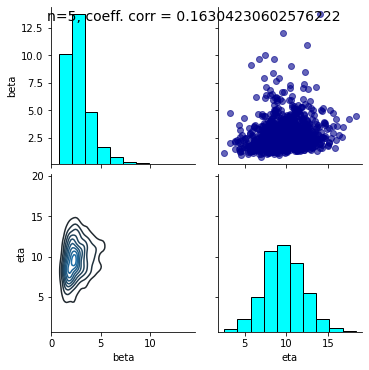

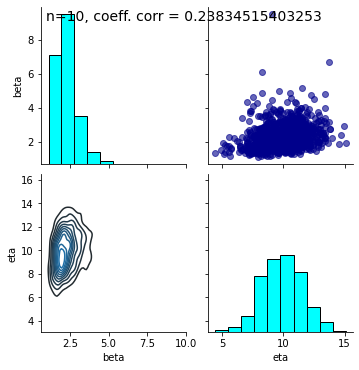

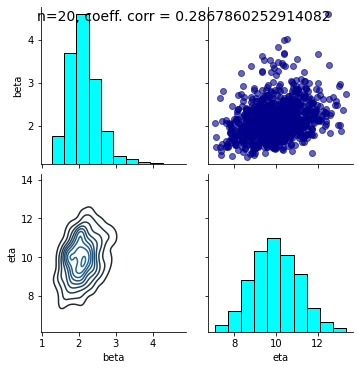

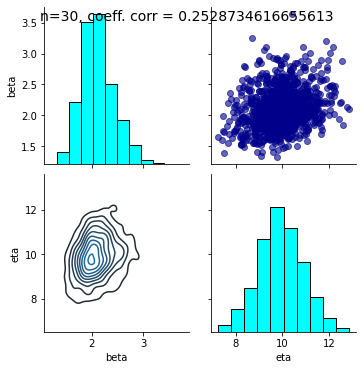

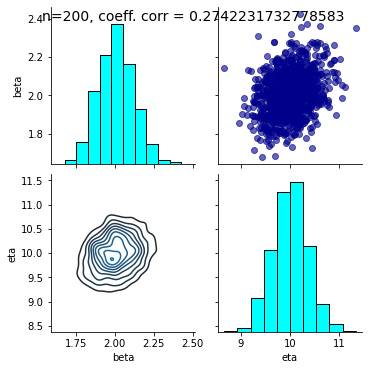

In [ ]:
np.random.seed(10)
n = np.array([5, 10, 20, 30, 200]) # taille des échantillons
nSim = 1000 # nombre d'échantillons simulés

#estimations ponctuelles
betaChapEMV = np.zeros((nSim,n.size)) 
etaChapEMV = np.zeros((nSim,n.size))
# bornes inf et sup
bornesInfbeta = np.zeros((nSim,n.size)) 
bornesSupbeta= np.zeros((nSim,n.size))
bornesInfeta = np.zeros((nSim,n.size))
bornesSupeta= np.zeros((nSim,n.size))

testb = np.zeros((nSim,n.size)) # test appartenance de la vraie valeur beta à l'IC
teste = np.zeros((nSim,n.size))# test appartenance de la vraie valeur eta à l'IC

for i in range(n.size): # taille de l'échantillon
    for j in range(nSim): # à taille fixée, on répète l'estimation sur les nSim échantillons
        x = scipy.stats.weibull_min.rvs(theta[0], loc=0, scale=theta[1], size = n[i])
        res = scipy.optimize.minimize(moinsLikel, theta0, args=x, method="SLSQP")
        betaChapEMV[j,i] = res.x[0] # j = indice n° échantillon, i = indice taille échant.
        etaChapEMV[j,i] = res.x[1]
        
        thetaChapEMV = res.x
        InTheta = matFisher(thetaChapEMV,x)
        CovTheta = np.linalg.inv(InTheta)
        
        bornesInfbeta[j,i]= betaChapEMV[j,i]-fractile*np.sqrt(CovTheta[0,0])
        bornesSupbeta[j,i]= betaChapEMV[j,i]+fractile*np.sqrt(CovTheta[0,0])
        bornesInfeta[j,i]= etaChapEMV[j,i]-fractile*np.sqrt(CovTheta[1,1])
        bornesSupeta[j,i]= etaChapEMV[j,i]+fractile*np.sqrt(CovTheta[1,1])
        
        testb[j,i] = bornesInfbeta[j,i]<=theta[0]<bornesSupbeta[j,i]
        teste[j,i] = bornesInfeta[j,i]<=theta[1]<bornesSupeta[j,i]
        
    
    # Tracé des données 
    resPearson = scipy.stats.pearsonr(betaChapEMV[:,i],etaChapEMV[:,i] ) # correlation linéaire estimée
    rXY = resPearson[0]
    
    d = {'beta': betaChapEMV[:,i], 'eta': etaChapEMV[:,i]}
    df = pd.DataFrame(data=d)
    g = sns.PairGrid(df, diag_sharey=True)
    g.map_lower(sns.kdeplot)
    g.map_upper(plt.scatter, color = 'darkblue', alpha = 0.6)
    g.map_diag(plt.hist, bins = 10, color = 'cyan', edgecolor = 'k')
    plt.suptitle("n=" +str(n[i]) +", coeff. corr = " + str(rXY), size = 14);

[None, None, None, None]

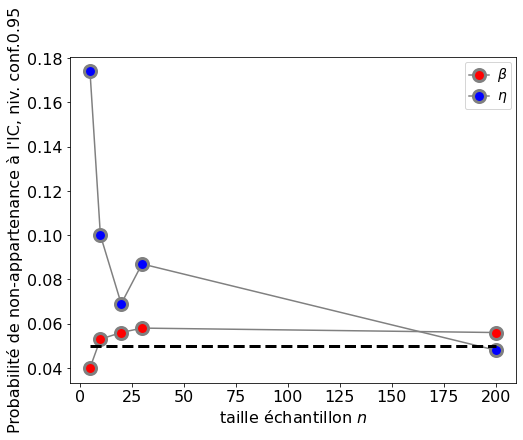

In [ ]:
# Probabilités d'appartenance des vraies valeurs aux ICs    
testb -=1
comptb = -np.sum(testb,axis = 0)
probaFalseBeta = comptb/nSim
    
teste -=1
compte = -np.sum(teste,axis = 0)
probaFalseEta = compte/nSim    
    
    
taille = 16
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.tick_params(axis='x', labelsize=taille)
ax.tick_params(axis='y', labelsize=taille)
plt.xlabel("taille échantillon $n$",fontsize=taille)
plt.ylabel("Probabilité de non-appartenance à l'IC, niv. conf." +str(1-alpha),fontsize=taille)
ax.plot(n,probaFalseBeta,'o-',color='grey',mfc='red', alpha=1.,markersize = 12, markeredgewidth = 3.,label ="$\\beta$")
ax.plot(n,probaFalseEta,'o-',color='grey',mfc='blue', alpha=1., markersize = 12, markeredgewidth = 3.,label="$\\eta$")
ax.plot(n,alpha*np.ones(n.size,),'--',color = 'black', LineWidth = 3.)
L = ax.legend()
plt.setp(L.texts,fontsize=14)

**Question 7 :** Tracer la fonction de vraisemblance **normalisée** par son maximum en fonction de $\theta$ pour différentes tailles d'échantillon et pour une même taille d'échantillon.

<ipython-input-2-49c1d4a8e792>:5: RuntimeWarning: invalid value encountered in log
  lnL = n*np.log(beta) - n*np.log(eta) + (beta-1)*np.sum(np.log(x)) \
<ipython-input-2-49c1d4a8e792>:6: RuntimeWarning: invalid value encountered in log
  - n*(beta-1)*np.log(eta) - np.sum((x/eta)**beta)
<ipython-input-2-49c1d4a8e792>:6: RuntimeWarning: invalid value encountered in power
  - n*(beta-1)*np.log(eta) - np.sum((x/eta)**beta)


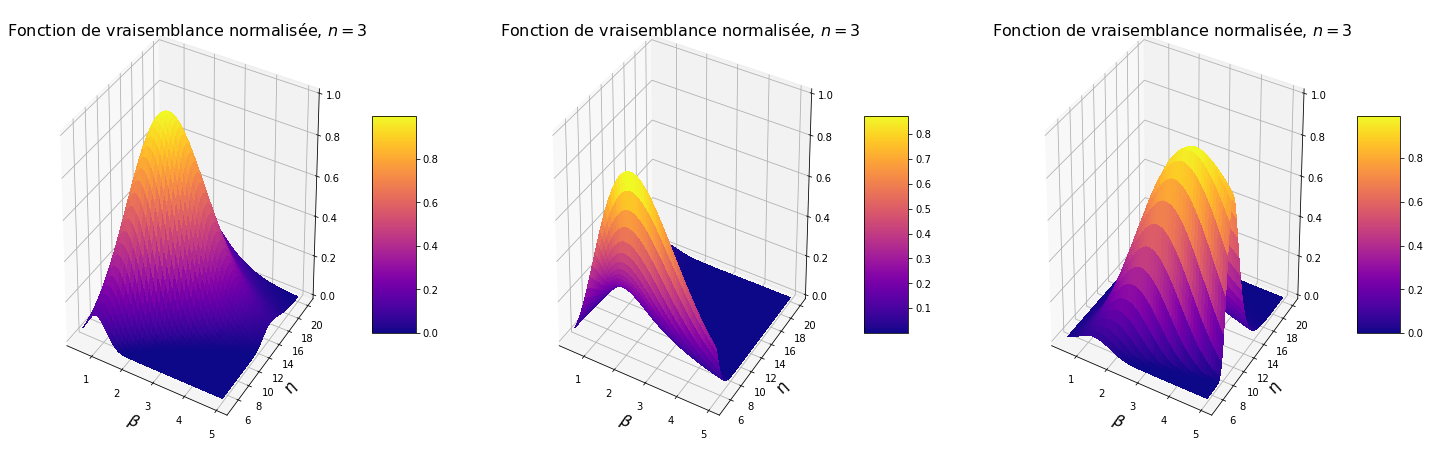

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

n= 3 # taille échantillon 
fig = plt.figure(figsize=(25, 8))
for it in range(3): # on simule 3 échantillons de taille n
    x = scipy.stats.weibull_min.rvs(theta[0], loc=0, scale=theta[1], size=n)
    
    # Grille pour le tracé de la fonction de vraisemblance
    t1 = np.linspace(0.5, 5, 100) 
    t2 = np.linspace(5, 20, 100)
    t1, t2 = np.meshgrid(t1, t2)
    
    z = np.zeros((np.size(t1,0),np.size(t1,1)))
    for i in range(np.size(t1,0)):
        for j in range(np.size(t1,1)):
            z[i,j] = ...
            
    res = scipy.optimize.minimize(moinsLikel, (theta0), args=(x,), method='SLSQP')

    ax = fig.add_subplot(1,3,it+1, projection='3d')
    surf = ax.plot_surface(t1, t2, ..., cmap=cm.plasma, linewidth=0, antialiased=False)
    ax.set_zlim(0., 1)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel("$\\beta$",fontsize=taille)
    plt.ylabel("$\\eta$",fontsize=taille)
    plt.title('Fonction de vraisemblance normalisée, $n=$' + str(n), fontsize = taille)

**Question 8 :** Estimer les ICs par bootstrap. Comparer les deux méthodes d'estimation par intervalles de confiance étudiées en utilisant le même échantillon pour l'estimation.

In [ ]:
np.random.seed(10)
n = 30 # taille d'échantillon
nb = 1000 # nombre d'échantillons Bootstrap
x = scipy.stats.weibull_min.rvs(theta[0], loc=0, scale=theta[1], size=n)
betaChapEB = np.zeros((nb,))
etaChapEB = np.zeros((nb,))

for i in range(nb):
    ind = scipy.stats.randint.rvs(low = 1,high = n, size = n)
    xBoot = ...
    res = scipy.optimize.minimize(moinsLikel, (theta0), args=(xBoot,), method='SLSQP')
    betaChapEB[i] = res.x[0]
    etaChapEB[i] = res.x[1]

borneInfEBbeta = np.percentile(betaChapEB,(alpha/2)*100)
borneSupEBbeta= np.percentile(betaChapEB, (1-alpha/2)*100)
borneInfEBeta = np.percentile(etaChapEB,(alpha/2)*100)
borneSupEBeta= np.percentile(etaChapEB, (1-alpha/2)*100)
print("Les bornes de l' 'intervalle de confiance de beta estimées par Bootstrap sont :"\
      , borneInfEBbeta, borneSupEBbeta)
print('\n')
print("Les bornes de l' 'intervalle de confiance de beta estimées par Bootstrap sont :", borneInfEBeta, borneSupEBeta)